
🔥 Model 'ols' Evaluation:
R²: 1.0000
MAE: 0.0000
MSE: 0.0000
✅ OLS model trained and saved.
OLS metrics: {'R²': 1.0, 'MAE': 1.2050804798491299e-11, 'MSE': 1.5052926158489162e-22}


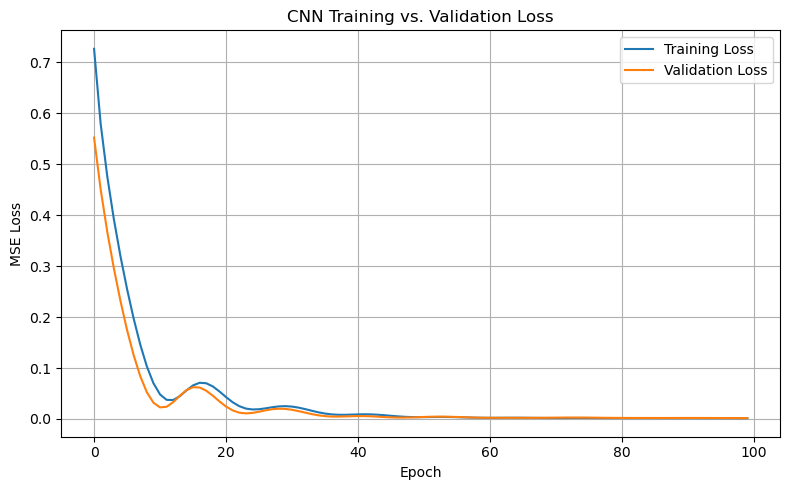


🔥 Model 'cnn' Evaluation:
R²: 0.9721
MAE: 11.3023
MSE: 215.9033
Single CNN model metrics: {'R²': 0.9720541768361358, 'MAE': 11.30225269337013, 'MSE': 215.90327685479014}


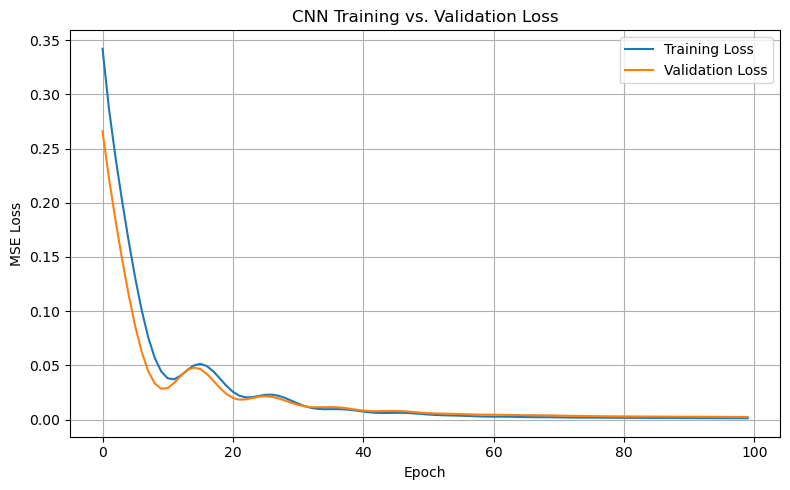

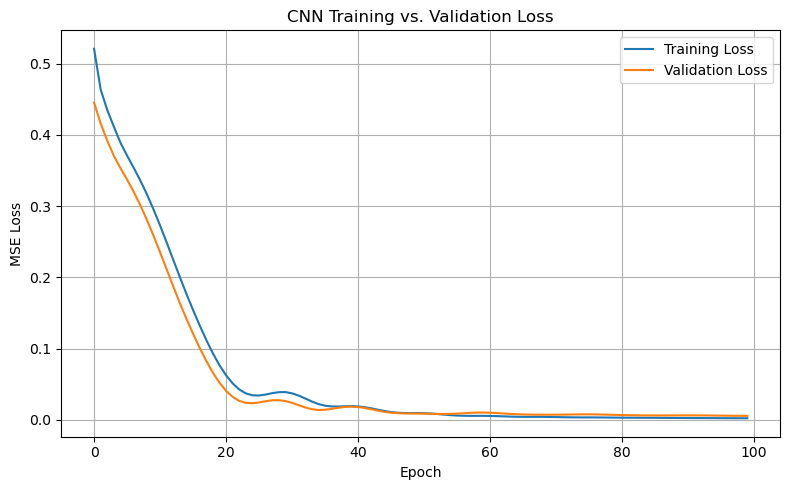

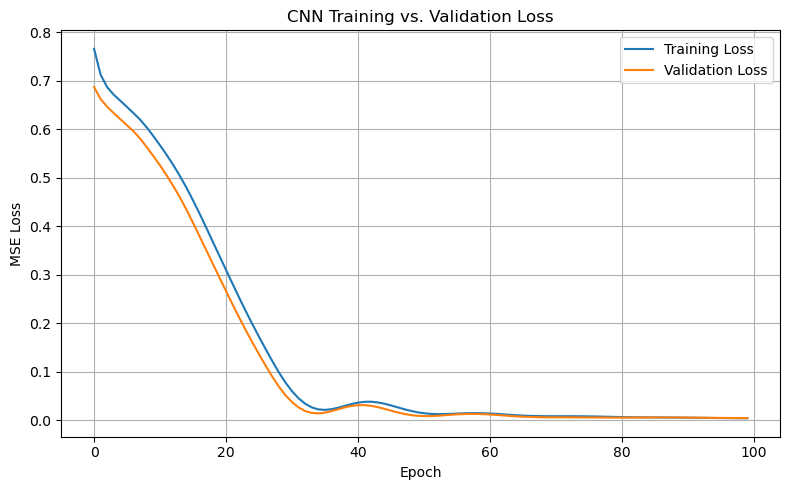


🔥 CNN Ensemble Evaluation:
R²: 0.9392
MAE: 18.2105
MSE: 469.7537
Ensemble metrics: {'R²': 0.9391965942617849, 'MAE': 18.21053948230783, 'MSE': 469.7537254793393}
Single CNN Predictions: [270.1664  235.97284 163.08617 235.62648 229.48146]
Averaged Ensemble Predictions: [156.92455 139.89288  93.67658 137.56479 129.24866]
OLS Predictions: [332.17061119 332.42226096 244.35095042 334.11067348 297.0608781 ]
✅ 3D surface plot saved to: examples/cnn_surface.html
Surface plot saved to examples/cnn_surface.html


In [3]:
# ✅ Test paths
train_path = "example_data_train_deterministic.xlsx"
test_path = "example_data_test_deterministic.xlsx"
import sys
import os

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath(".."))

from regressorpipeline.train import train_fire_model, train_multiple_cnn_for_fire
from regressorpipeline.predict import (
    load_model_bundle,
    predict_fire_risk,
    predict_fire_risk_from_models,
)
from regressorpipeline.visualize import plot_fire_risk_surface_matplotlib
import pandas as pd
import numpy as np
import joblib
import torch 
import argparse
import pandas as pd
import numpy as np
import joblib
import torch
import statsmodels.api as sm
from sklearn.base import BaseEstimator


# Train OLS on deterministic dataset
ols_model, ols_metrics = train_fire_model(
    model_name="ols",
    data_path="example_data_train_deterministic.xlsx",
    save=True,                   # ensures it saves to 'best_ols_model.joblib'
    scale_mode="original"       # use same scaling as data (no transform)
)

print("✅ OLS model trained and saved.")
print("OLS metrics:", ols_metrics)


# 🔧 1. Train and evaluate a single CNN model
model, metrics = train_fire_model("cnn", train_path, save=True)
print("Single CNN model metrics:", metrics)

# 🔧 2. Train CNN ensemble (3 runs) and save
models, metrics_list, ensemble_metrics = train_multiple_cnn_for_fire(
    train_path, n_runs=3, save=True
)
print("Ensemble metrics:", ensemble_metrics)

# 🔍 3. Load and test prediction (single CNN model)
models, scaler_X, scaler_y, feature_names = load_model_bundle("best_cnn_model.joblib")
preds = predict_fire_risk(
    models[0],
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Single CNN Predictions:", preds[:5])

# 🔍 4. Load and test ensemble prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("cnn_ensemble.joblib")
avg_preds = predict_fire_risk_from_models(
    models,
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Averaged Ensemble Predictions:", avg_preds[:5])

# 5. Load and test OLS model prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("best_ols_model.joblib")
ols_preds = predict_fire_risk(
    models[0],
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="ols"
)
print("OLS Predictions:", ols_preds[:5])

# 6. Generate CNN surface plot
# Load model bundle
models, scaler_X, scaler_y, feature_names = load_model_bundle("best_cnn_model.joblib")
scale_mode = "log_minmax"  # or retrieve from model bundle if stored

# Call the updated plotting function (handles data loading and preprocessing)
plot_fire_risk_surface_matplotlib(
    model=models[0],
    scaler_X=scaler_X,
    scaler_y=scaler_y,
    feature_names=feature_names,
    feat1_name="ThermalInertia",
    feat2_name="FuelLoadDensity",
    data_path=test_path,
    scale_mode="log_minmax",
    title="CNN Prediction Surface",
    save_path="examples/cnn_surface.html"
)


print("Surface plot saved to examples/cnn_surface.html")